In [1]:
# %%
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

# %%
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=2000)
lngs = np.random.uniform(-180.0,180.0,size=2000)

lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])


# %%
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

# %%
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.

# initial counters for log and sets
record_count = 1 
set_count = 1

city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1 
        set_count +=1
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Country':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

print(len(city_data))

[(73.88293717128585, -40.67165669890883), (73.02825471167233, -145.83274548240257), (52.19248502907931, 83.8907271256943), (86.84973548041731, -50.31099208479421), (-89.04671399988686, 122.71769393766817), (17.04439731309286, 80.62059603371779), (86.17189407826956, -5.279642086158987), (-42.03438301455185, 19.435691176531947), (82.8689203623886, -101.8301811576207), (-8.063248438368504, 98.1321466434461), (64.59426469256744, 75.49113407493016)]
['tasiilaq', 'fairbanks', 'petropavlovskoye', 'upernavik', 'new norfolk', 'nuzvid', 'barentsburg', 'bredasdorp', 'yellowknife', 'bengkulu'] Generate 617
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | fairbanks
Processing Record 3 of Set 1 | petropavlovskoye
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | nuzvid
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Recor

City not found. Skipping...
Processing Record 24 of Set 4 | bandarbeyla
Processing Record 25 of Set 4 | henties bay
Processing Record 26 of Set 4 | sterling
Processing Record 27 of Set 4 | miri
Processing Record 28 of Set 4 | presidencia roque saenz pena
Processing Record 29 of Set 4 | forestville
Processing Record 30 of Set 4 | portland
Processing Record 31 of Set 4 | mattru
Processing Record 32 of Set 4 | matay
Processing Record 33 of Set 4 | reinosa
Processing Record 34 of Set 4 | pevek
Processing Record 35 of Set 4 | port elizabeth
Processing Record 36 of Set 4 | namagiripettai
Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | kirkwall
Processing Record 39 of Set 4 | irbeyskoye
Processing Record 40 of Set 4 | sovetskaya gavan
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | nauta
Processing Record 43 of Set 4 | williams lake
Processing Record 44 of Set 4 | huntsville
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Pr

Processing Record 17 of Set 8 | luangwa
Processing Record 18 of Set 8 | chiredzi
Processing Record 19 of Set 8 | sivaki
Processing Record 20 of Set 8 | itarema
Processing Record 21 of Set 8 | toda raisingh
Processing Record 22 of Set 8 | te anau
Processing Record 23 of Set 8 | palana
Processing Record 24 of Set 8 | morros
Processing Record 25 of Set 8 | denpasar
Processing Record 26 of Set 8 | honavar
Processing Record 27 of Set 8 | arawa
Processing Record 28 of Set 8 | coihaique
Processing Record 29 of Set 8 | belaya gora
Processing Record 30 of Set 8 | kutum
Processing Record 31 of Set 8 | behshahr
Processing Record 32 of Set 8 | aswan
Processing Record 33 of Set 8 | sibutad
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | ribeira brava
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | karaul
City not found. Skipping...
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | nicoya
Processing Record 40 of Set 8 | kushim

Processing Record 8 of Set 12 | lagoa
Processing Record 9 of Set 12 | inhambane
Processing Record 10 of Set 12 | tessalit
Processing Record 11 of Set 12 | nizhneudinsk
Processing Record 12 of Set 12 | baracoa
Processing Record 13 of Set 12 | port blair
Processing Record 14 of Set 12 | alice springs
Processing Record 15 of Set 12 | sinkat
City not found. Skipping...
Processing Record 16 of Set 12 | salym
Processing Record 17 of Set 12 | entrerrios
Processing Record 18 of Set 12 | poum
Processing Record 19 of Set 12 | labutta
City not found. Skipping...
Processing Record 20 of Set 12 | namioka
Processing Record 21 of Set 12 | uyemskiy
Processing Record 22 of Set 12 | ratho
Processing Record 23 of Set 12 | pasni
Processing Record 24 of Set 12 | vila do maio
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | half moon bay
Processing Record 27 of Set 12 | conakry
Processing Record 28 of Set 12 | dera bugti
Processing Record 29 of Set 12 | namibe
Processing Record 30 o

In [2]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,tasiilaq,GL,2020-11-09 22:23:59,65.61,-37.64,31.46,97,100,29.86
1,fairbanks,US,2020-11-09 22:20:19,64.84,-147.72,26.60,79,75,5.82
2,petropavlovskoye,RU,2020-11-09 22:30:46,52.07,84.11,37.33,76,100,12.50
3,upernavik,GL,2020-11-09 22:24:07,72.79,-56.15,1.47,82,46,6.91
4,new norfolk,AU,2020-11-09 22:23:56,-42.78,147.06,64.00,59,98,1.01
5,nuzvid,IN,2020-11-09 22:30:46,16.78,80.85,63.64,70,0,4.16
6,bredasdorp,ZA,2020-11-09 22:30:47,-34.53,20.04,50.00,81,21,4.70
7,yellowknife,CA,2020-11-09 22:30:05,62.46,-114.35,26.01,85,75,6.93
8,bengkulu,ID,2020-11-09 22:30:47,-3.80,102.27,76.10,83,98,3.18
9,gubkinskiy,RU,2020-11-09 22:30:48,64.43,76.50,14.85,97,98,4.29


In [3]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [4]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


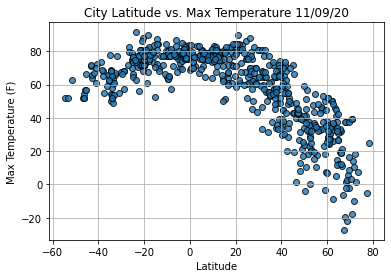

In [5]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

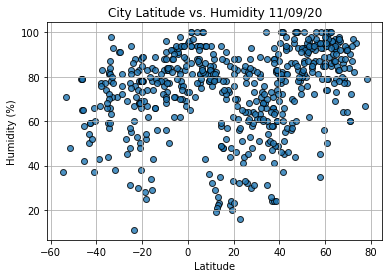

In [6]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

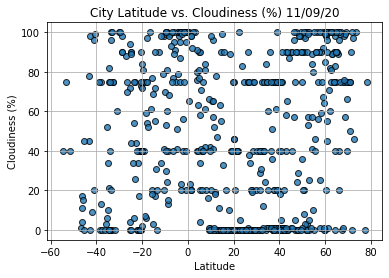

In [7]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


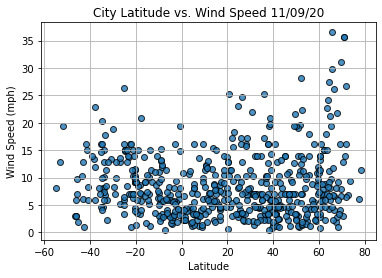

In [8]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [9]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [10]:
index13 = city_data_df.loc[13]
index13

City                       torbay
Country                        CA
Date          2020-11-09 22:21:21
Lat                         47.67
Lng                        -52.73
Max Temp                    39.99
Humidity                      100
Cloudiness                     90
Wind Speed                   6.93
Name: 13, dtype: object

In [11]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
569     True
570     True
571     True
572    False
573    False
Name: Lat, Length: 574, dtype: bool

In [12]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,tasiilaq,GL,2020-11-09 22:23:59,65.61,-37.64,31.46,97,100,29.86
1,fairbanks,US,2020-11-09 22:20:19,64.84,-147.72,26.60,79,75,5.82
2,petropavlovskoye,RU,2020-11-09 22:30:46,52.07,84.11,37.33,76,100,12.50
3,upernavik,GL,2020-11-09 22:24:07,72.79,-56.15,1.47,82,46,6.91
5,nuzvid,IN,2020-11-09 22:30:46,16.78,80.85,63.64,70,0,4.16
...,...,...,...,...,...,...,...,...,...
567,tripoli,LY,2020-11-09 22:31:35,32.88,13.19,67.57,61,12,1.92
568,campobello di mazara,IT,2020-11-09 22:34:15,37.64,12.74,55.40,93,0,3.36
569,harnosand,SE,2020-11-09 22:34:16,62.63,17.94,37.00,100,81,2.24
570,ardakan,IR,2020-11-09 22:34:16,32.31,54.02,57.20,44,0,4.70


In [13]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

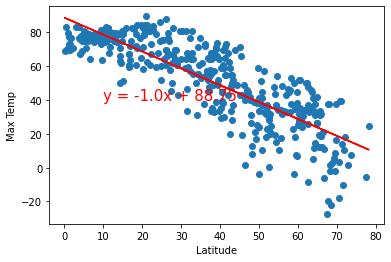

In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

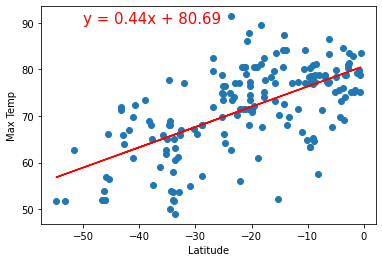

In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

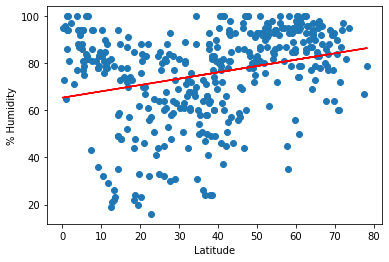

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

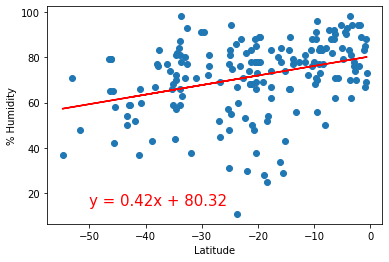

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

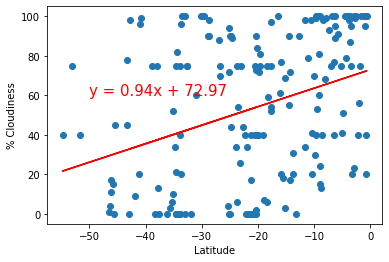

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

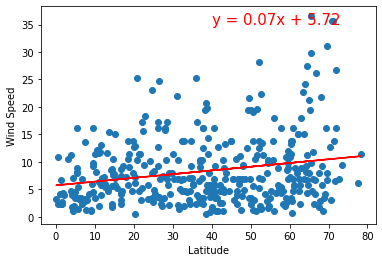

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

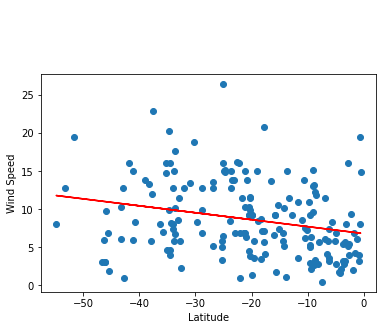

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))